# Installing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install pandas_datareader

In [3]:
import pandas_datareader
import datetime

In [4]:
import pandas_datareader as web

# Importing data

In [5]:
start = datetime.datetime(2017, 1, 1)
end = datetime.date.today()
wipro = web.DataReader("WIPRO.NS", 'yahoo', start, end)

In [6]:
start = datetime.datetime(2017, 1, 1)
end = datetime.date.today()
tcs = web.DataReader("TCS.NS", 'yahoo', start, end)

In [7]:
start = datetime.datetime(2017, 1, 1)
end = datetime.date.today()
hcl = web.DataReader("HCLTECH.NS", 'yahoo', start, end)

In [8]:
wipro.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-30,260.899994,253.399994,258.000000,254.750000,4059545.0,253.156509
2020-03-06,226.000000,222.550003,225.000000,223.550003,2934283.0,223.048538
2020-01-22,251.949997,245.399994,248.600006,245.850006,3400424.0,244.312195
2019-12-23,254.699997,251.600006,252.800003,253.850006,1850652.0,252.262161
2019-01-23,266.850067,261.000061,261.487579,263.662567,13249898.0,261.275574


In [9]:
tcs.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-30,2156.550049,2114.399902,2123.000000,2146.300049,4971725.0,2039.557617
2020-11-24,2743.000000,2705.000000,2734.399902,2722.050049,3120516.0,2716.879883
2017-11-14,1378.275024,1353.750000,1378.275024,1357.300049,1657252.0,1268.166016
2020-07-16,2333.000000,2220.100098,2244.000000,2234.750000,8582118.0,2221.035889
2017-08-30,1245.000000,1230.050049,1240.500000,1242.275024,970782.0,1157.543335


In [10]:
hcl.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-27,520.150024,512.500000,513.000000,519.500000,2488450.0,505.535034
2017-12-08,436.399994,431.700012,434.850006,435.225006,1739846.0,420.905762
2019-08-19,538.974976,528.825012,532.799988,532.025024,1682212.0,521.719543
2019-07-02,532.325012,521.500000,526.500000,530.000000,2014050.0,518.764587
2017-09-04,436.950012,428.500000,436.950012,430.299988,1149942.0,415.170227


# Visualizing data

__I'm taking closing price into consideration as it is considered to be the most accurate valuation of a stock or other security until trading resumes on the next trading day.<br> Source: https://www.investopedia.com/terms/c/closingprice.asp__

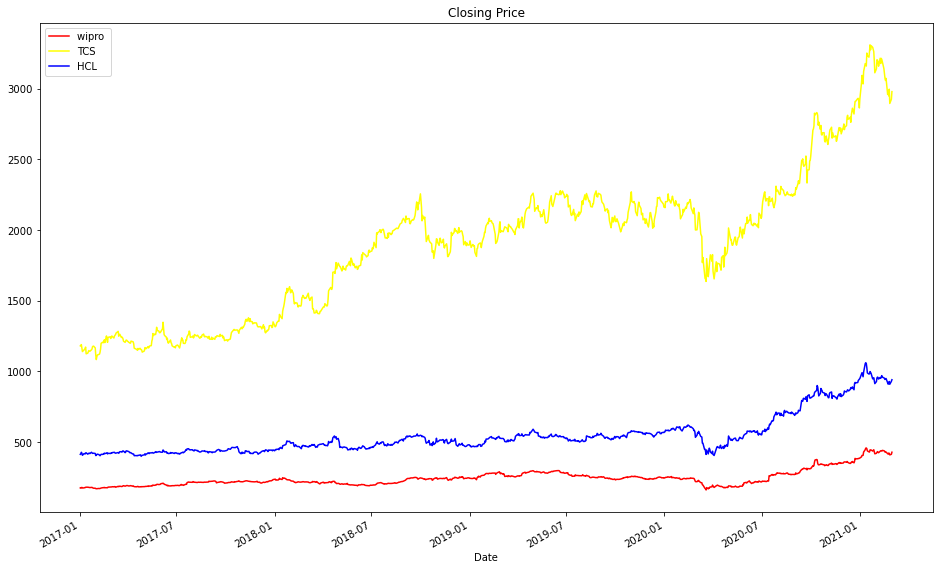

In [11]:
wipro['Close'].plot(label='wipro ', figsize=(16,10),color='red')
tcs['Close'].plot(label='TCS ', figsize=(16,10),color='yellow')
hcl['Close'].plot(label='HCL ', figsize=(16,10),color='blue')
plt.title('Closing Price')
plt.legend()
plt.show()

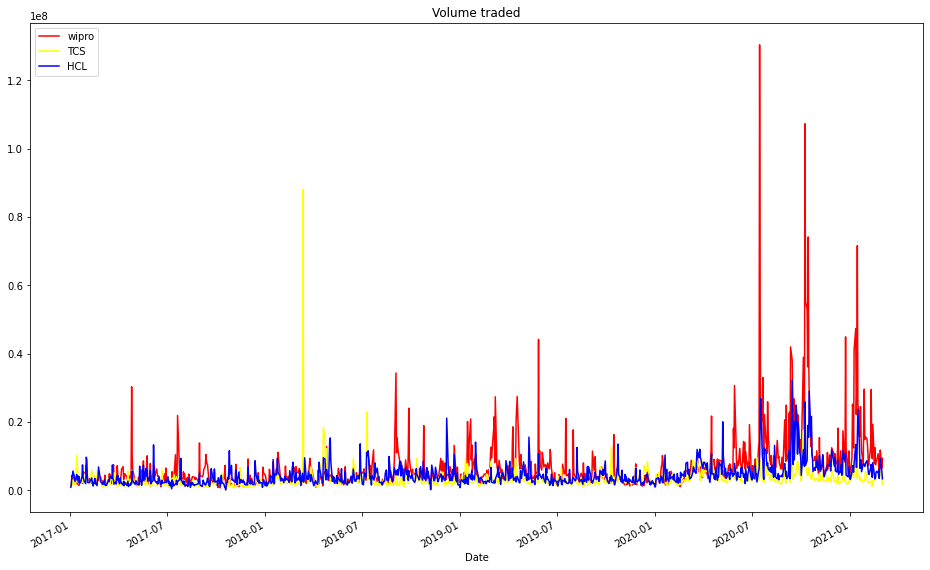

In [12]:
wipro['Volume'].plot(label='wipro', figsize=(16,8),color='red')
tcs['Volume'].plot(label='TCS ', figsize=(16,20),color='yellow')
hcl['Volume'].plot(label='HCL ', figsize=(16,10),color='blue')
plt.title('Volume traded')
plt.legend(loc='upper left')
plt.show()

In [13]:
wipro['Volume'].mean().round()

6767935.0

In [14]:
tcs['Volume'].mean().round()

3197731.0

In [15]:
hcl['Volume'].mean().round()

4544501.0

__The Close Price Time Series Visualization makes TCS look like its always been much more valuable as a company than Wipro and HCL. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.__ <br> <br>__Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.__

In [16]:
tcs['Total Traded'] = tcs['Open']*tcs['Volume']
hcl['Total Traded'] = hcl['Open']*hcl['Volume']
wipro['Total Traded'] = wipro['Open']*wipro['Volume']

__Visualizing total traded__

Text(0, 0.5, 'Total Traded')

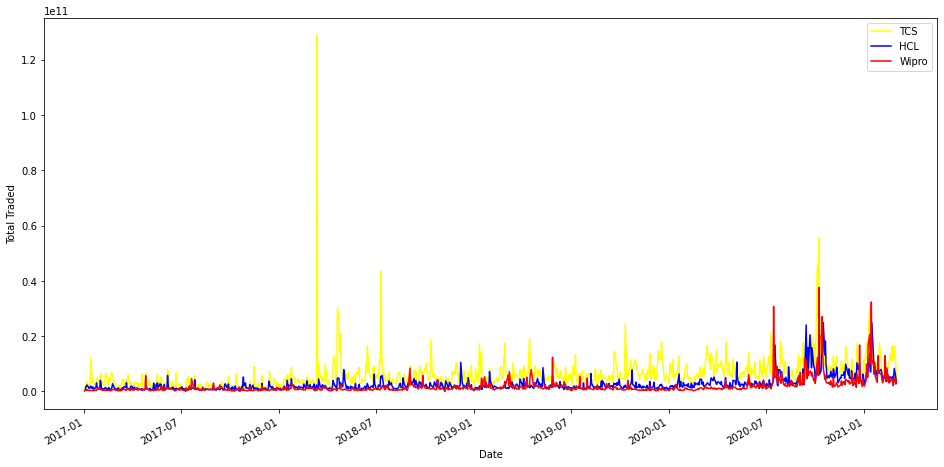

In [17]:
tcs['Total Traded'].plot(label='TCS',figsize=(16,8),color='yellow')
hcl['Total Traded'].plot(label='HCL',color='blue')
wipro['Total Traded'].plot(label='Wipro',color='red')
plt.legend()
plt.ylabel('Total Traded')

In [18]:
tcs['Total Traded'].argmax()

296

__Let's plot out 50 day and 200 day moving averages.__

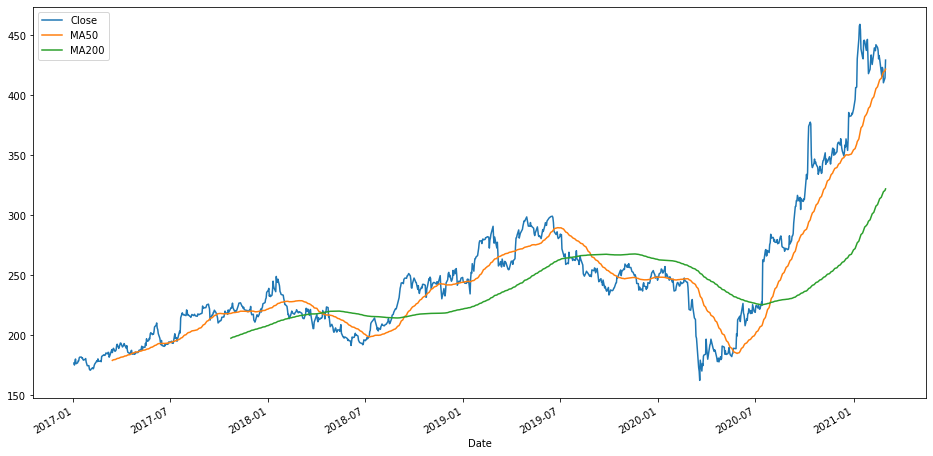

In [19]:
wipro['MA50'] = wipro['Close'].rolling(50).mean()
wipro['MA200'] = wipro['Close'].rolling(200).mean()
wipro[['Close','MA50','MA200']].plot(label='Wipro',figsize=(16,8))

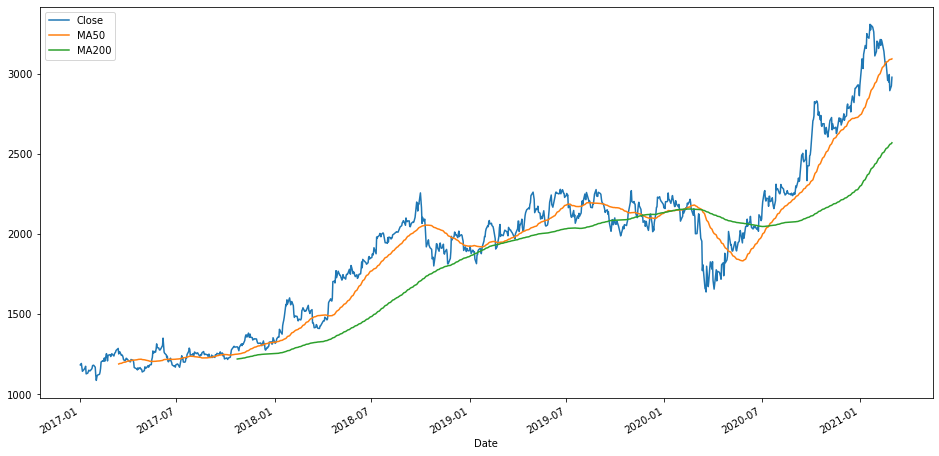

In [20]:
tcs['MA50'] = tcs['Close'].rolling(50).mean()
tcs['MA200'] = tcs['Close'].rolling(200).mean()
tcs[['Close','MA50','MA200']].plot(label='TCS',figsize=(16,8))

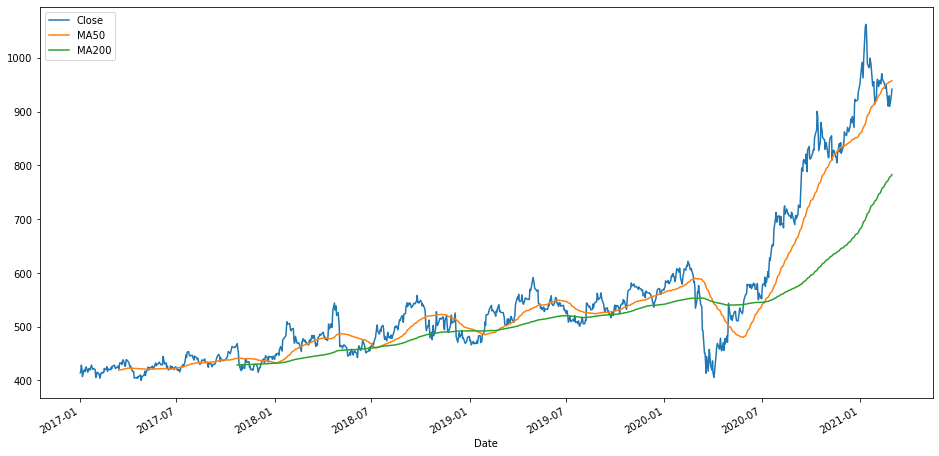

In [21]:
hcl['MA50'] = hcl['Close'].rolling(50).mean()
hcl['MA200'] = hcl['Close'].rolling(200).mean()
hcl[['Close','MA50','MA200']].plot(label='HCL',figsize=(16,8))

__To find a relationship between these 3 IT stocks, we can use a scatter matrix plot of all the stocks' closing prices.__

In [22]:
import seaborn as sns

In [23]:
it=pd.concat([tcs['Close'], hcl['Close'],wipro['Close']],axis=1)

In [24]:
it.columns=['TCS Close', 'Wipro Close', 'HCL Close']

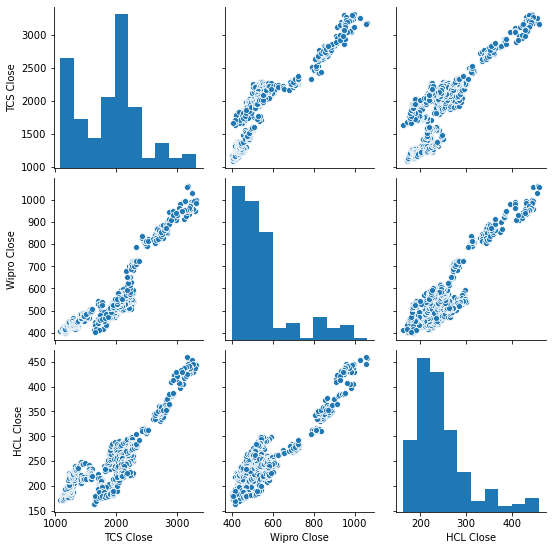

In [25]:
sns.pairplot(it)
plt.show()

# Creating a candlestick chart

__Create a CandleStick chart for Wipro in March 2020 (too many dates won't look good for a candlestick chart)__

In [26]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [27]:
import mplfinance as mpf

In [28]:
# Rest the index to get a column of March Dates
wipro_reset = wipro.loc['2020-03-01':'2020-03-31'].reset_index()
#To remove the default serial number column, we set first column as date
wipro_reset.set_index("Date", inplace = True) 

In [29]:
wipro_reset.head(10)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200
Date,,,,,,,,,
2020-03-02,227.000000,218.399994,225.800003,220.800003,5766175.0,220.304718,1.302002e+09,245.636001,256.96400
2020-03-03,225.800003,220.600006,224.000000,223.699997,5173113.0,223.198196,1.158777e+09,245.074001,256.63075
2020-03-04,229.750000,222.449997,224.899994,228.850006,4518178.0,228.336655,1.016138e+09,244.574001,256.32950
2020-03-05,233.899994,228.649994,229.050003,229.699997,2970778.0,229.184738,6.804567e+08,244.123000,256.05500
2020-03-06,226.000000,222.550003,225.000000,223.550003,2934283.0,223.048538,6.602137e+08,243.588000,255.75775
2020-03-09,221.000000,213.000000,220.199997,214.399994,8731114.0,213.919067,1.922591e+09,242.925000,255.40300
2020-03-11,214.399994,203.699997,203.699997,213.100006,6135166.0,212.621994,1.249733e+09,242.208000,255.03650
2020-03-12,206.949997,197.500000,204.000000,199.100006,5382005.0,198.653397,1.097929e+09,241.274001,254.58075
2020-03-13,204.449997,169.250000,199.000000,197.399994,6521598.0,196.957199,1.297798e+09,240.268000,254.13325


__We can see above that non-trading days have been eliminated by using the new matplotlib finance API. Also, I've saved the required data & eliminated the first column of serial numbers.__

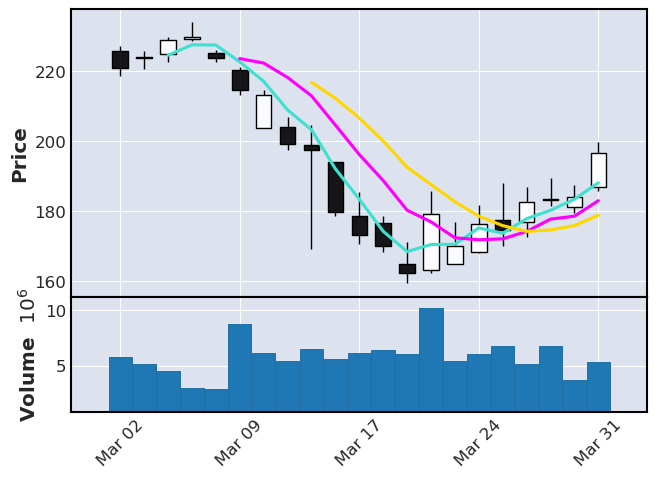

In [30]:
mpf.plot(wipro_reset,type='candle',mav=(3,6,9), volume=True)

__I've plotted a candlestick chart above. We can also plot moving averages with the mav keyword. Also, volume can be displayed. Non-trading days,represented in the graph using gaps, can be displayed with the 'show_nontrading' keyword.__

# Basic Financial Analysis

__Now it is time to focus on a few key financial calculations. This will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data.__

(1) First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:<br>
$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

__Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method.__

In [31]:
# Method 1: Using shift
tcs['returns'] = (tcs['Close'] / tcs['Close'].shift(1) ) - 1
tcs.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2017-01-02,1187.550049,1176.199951,1183.300049,1180.675049,823132.0,1081.838379,9.740121e+08,NaN,NaN,NaN
2017-01-03,1185.849976,1171.650024,1180.625000,1184.125000,1475324.0,1084.999390,1.741804e+09,NaN,NaN,0.002922
2017-01-04,1194.425049,1179.150024,1184.849976,1189.750000,1420066.0,1090.153809,1.682565e+09,NaN,NaN,0.004750
2017-01-05,1194.974976,1160.199951,1192.000000,1167.199951,2216404.0,1069.491211,2.641954e+09,NaN,NaN,-0.018954
2017-01-06,1164.675049,1128.550049,1160.500000,1140.699951,3009896.0,1045.209595,3.492984e+09,NaN,NaN,-0.022704


In [32]:
#Method 2
tcs['returns'] = tcs['Close'].pct_change(1)
tcs.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2017-01-02,1187.550049,1176.199951,1183.300049,1180.675049,823132.0,1081.838379,9.740121e+08,NaN,NaN,NaN
2017-01-03,1185.849976,1171.650024,1180.625000,1184.125000,1475324.0,1084.999390,1.741804e+09,NaN,NaN,0.002922
2017-01-04,1194.425049,1179.150024,1184.849976,1189.750000,1420066.0,1090.153809,1.682565e+09,NaN,NaN,0.004750
2017-01-05,1194.974976,1160.199951,1192.000000,1167.199951,2216404.0,1069.491211,2.641954e+09,NaN,NaN,-0.018954
2017-01-06,1164.675049,1128.550049,1160.500000,1140.699951,3009896.0,1045.209595,3.492984e+09,NaN,NaN,-0.022704


__Repeat the desired method for other dataframes.__

In [33]:
hcl['returns'] = hcl['Close'].pct_change(1)
wipro['returns'] = wipro['Close'].pct_change(1)
wipro.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2017-01-02,179.400040,176.437546,178.143799,176.831299,1230474.0,173.894135,2.192013e+08,NaN,NaN,NaN
2017-01-03,177.787537,174.637543,177.375046,175.125046,1843468.0,172.216217,3.269852e+08,NaN,NaN,-0.009649
2017-01-04,179.100037,174.787537,175.125046,178.350037,3025319.0,175.387650,5.298091e+08,NaN,NaN,0.018415
2017-01-05,182.212540,178.912537,178.912537,180.150040,2608498.0,177.157745,4.666930e+08,NaN,NaN,0.010093
2017-01-06,180.037552,175.875046,179.437546,176.231293,4190860.0,173.304092,7.519976e+08,NaN,NaN,-0.021753


In [34]:
hcl.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2017-01-02,417.000000,411.149994,411.500000,414.250000,842486.0,393.082581,3.466830e+08,NaN,NaN,NaN
2017-01-03,418.500000,411.750000,415.500000,417.575012,1437066.0,396.237640,5.971009e+08,NaN,NaN,0.008027
2017-01-04,430.000000,416.524994,417.774994,428.475006,4233756.0,406.580750,1.768757e+09,NaN,NaN,0.026103
2017-01-05,434.875000,420.049988,430.000000,422.325012,4157614.0,400.745026,1.787774e+09,NaN,NaN,-0.014353
2017-01-06,420.149994,403.375000,417.500000,407.200012,5591598.0,386.392853,2.334492e+09,NaN,NaN,-0.035814


__Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns)__

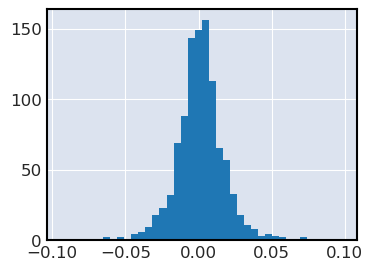

In [35]:
tcs['returns'].hist(bins=40, figsize=(4,3))

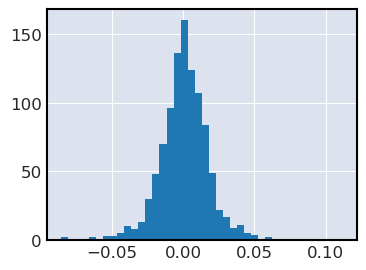

In [36]:
hcl['returns'].hist(bins=40, figsize=(4,3))

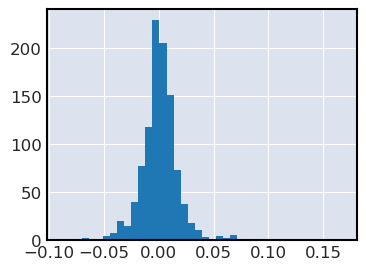

In [37]:
wipro['returns'].hist(bins=40, figsize=(4,3))

__KDE plot instead of histograms gives another view point. The stock with the widest plot has highest density.__

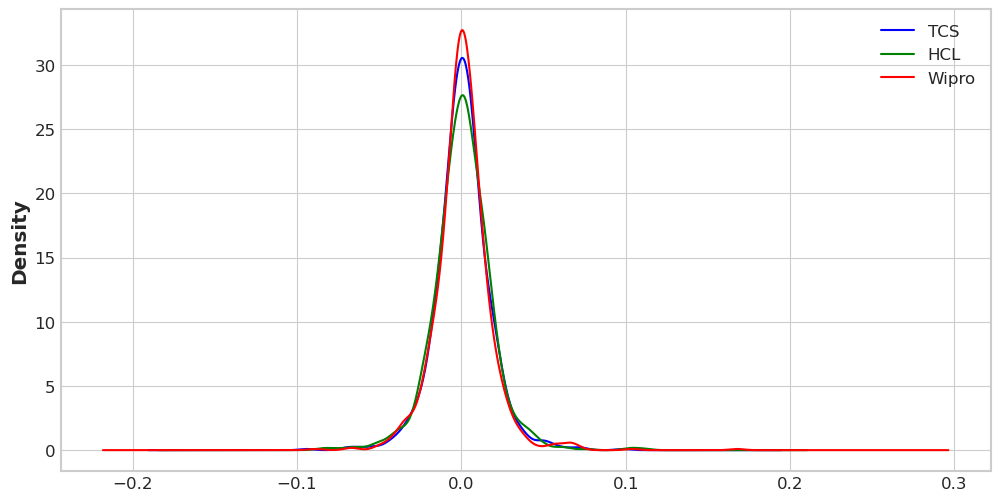

In [65]:
tcs['returns'].plot(kind='kde',label='TCS', figsize=(12,6), color='blue', linewidth=1.5);
hcl['returns'].plot(kind='kde',label='HCL', color='green', linewidth=1.5);
wipro['returns'].plot(kind='kde',label='Wipro', color='red', linewidth=1.5);
plt.legend();

__HCL is the most wide ranging in terms of density.__

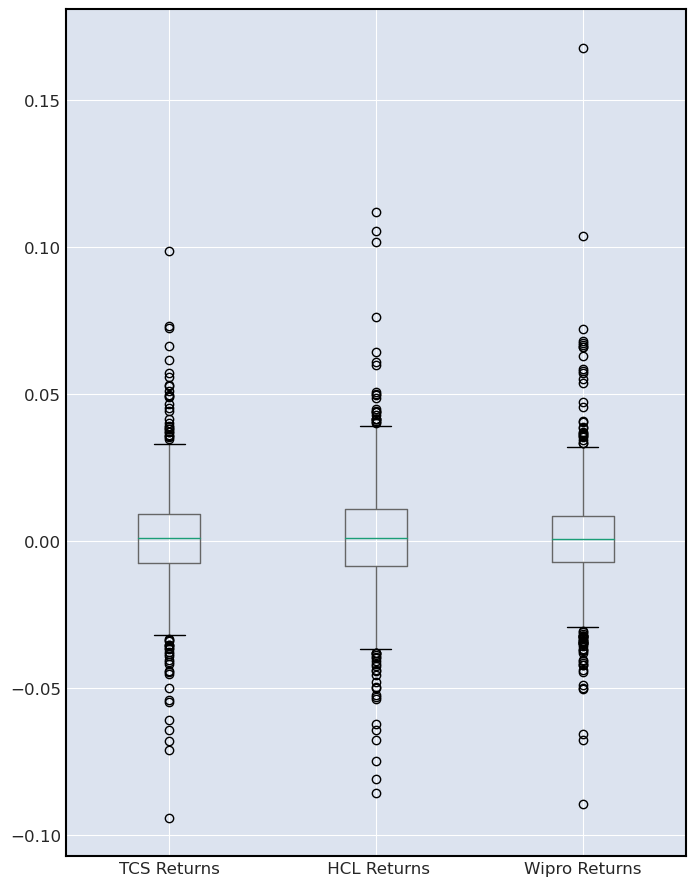

In [39]:
box = pd.concat([tcs['returns'],hcl['returns'],wipro['returns']],axis=1)
box.columns = ['TCS Returns',' HCL Returns','Wipro Returns']
box.plot(kind='box',figsize=(8,11),colormap='Dark2_r');

# Comparing Daily Returns between Stocks

__Create a  pairplot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the IT companies are.__

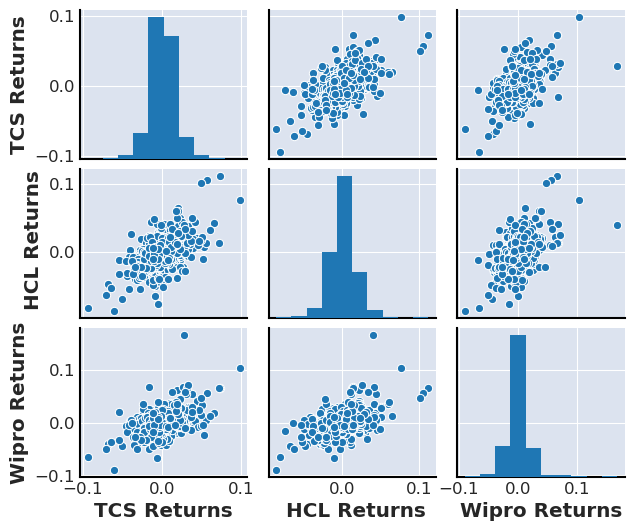

In [40]:
g=sns.pairplot(data=box);
sns.set_style('whitegrid');
g.fig.set_size_inches(6,5);

__Looks like TCS and HCL have some kind of relation. Let's plot just these two against eachother in scatter plot to view this more closely.__

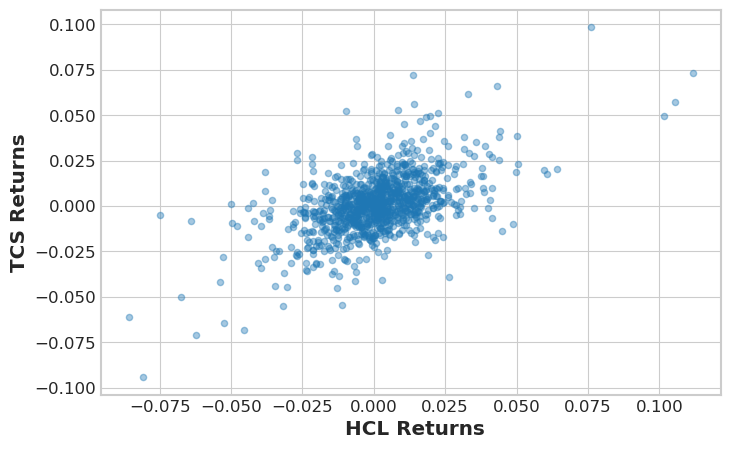

In [58]:
box.plot(kind='scatter',x=' HCL Returns',y='TCS Returns',alpha=0.4,figsize=(8,5));

# Finding cumulative daily return for each stock.

__A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. This calculation is represented by the following equation:__

$ i_i = (1+r_t) * i_{t-1} $ <br> <br>__This is calculated succinctly using the .cumprod() method:__




In [74]:
#calculate daily cumulative return for TCS 
tcs['Cumulative Return'] = (1 + tcs['returns']).cumprod()
tcs['Cumulative Return'].head()

Date
2017-01-02         NaN
2017-01-03    1.002922
2017-01-04    1.007686
2017-01-05    0.988587
2017-01-06    0.966142
Name: Cumulative Return, dtype: float64

__Similarly calculate cumulative returns for the other 2 stocks__

In [75]:
hcl['Cumulative Return'] = (1 + hcl['returns']).cumprod()
wipro['Cumulative Return'] = (1 + wipro['returns']).cumprod()


__Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for, lets say a $1 invested? Which showed the lowest?__

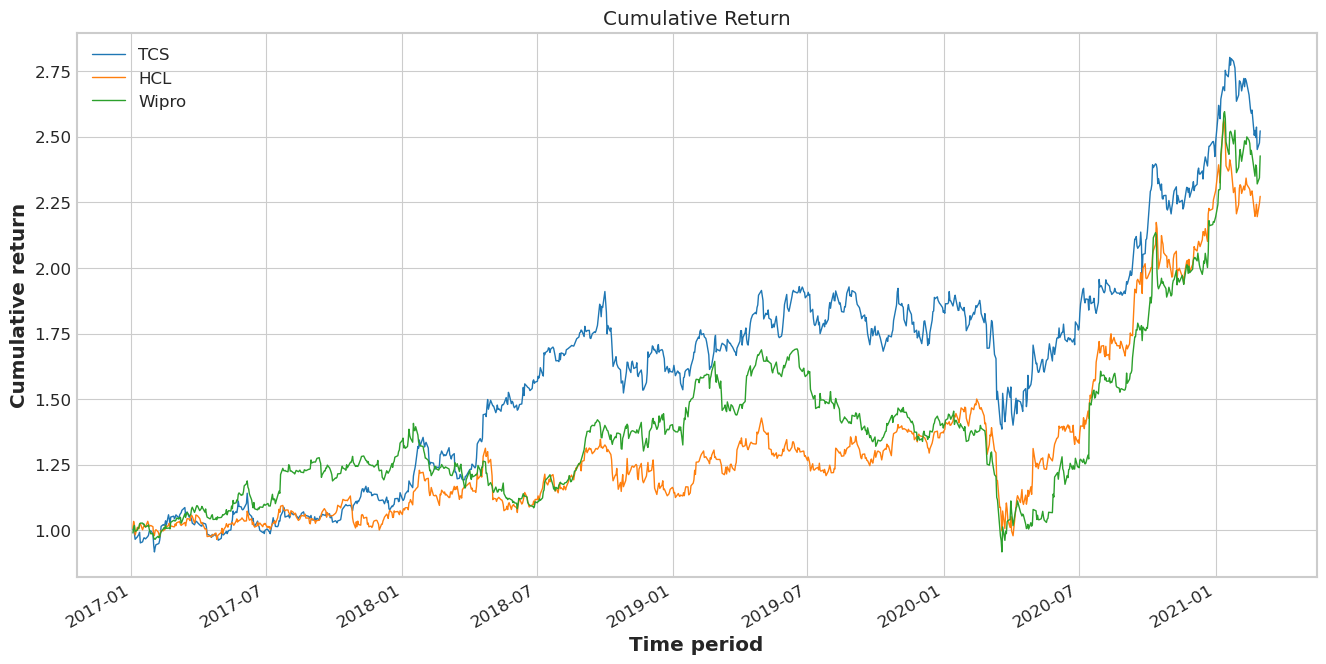

In [81]:
tcs['Cumulative Return'].plot(label='TCS',figsize=(16,8),title='Cumulative Return',linewidth=1);
hcl['Cumulative Return'].plot(label='HCL',linewidth=1);
wipro['Cumulative Return'].plot(label='Wipro',linewidth=1);
plt.legend();
plt.ylabel('Cumulative return')
plt.xlabel('Time period');

__Observations for cumulative returns:<br> (1) Until around February 2018, Wipro gave the highest cumulative return while sometimes almost being  equal to that of TCS and HCL. <br> (2) After mid-2018 and till date, TCS seems to provide the highest cumulative returns.<br> (3) Recently Wipro and HCL seem to provide almost equal cumulative returns.__

https://economictimes.indiatimes.com/markets/stocks/news/wipro-shares-likely-to-see-over-10-fall-in-next-4-8-weeks-heres-why/articleshow/60881455.cms

# That's all for now, THANK YOU!